<a href="https://colab.research.google.com/github/rpasquini/econometria/blob/main/notebooks/Diagnostico_de_residuos_y_regresi%C3%B3n_robusta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Nuestro primer objetivo será estimar el modelo:

$$ ingreso_i=\beta_0+\beta_1 aesc_i+\epsilon_i $$

donde ingreso es el ingreso total individual y aesc son los años de escolaridad.


In [2]:
df=pd.read_csv('https://github.com/rpasquini/econometria-iae/blob/main/datos/eah2022_bu_ampliada_ind.txt?raw=true',sep=';')

In [3]:
df

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,t50d_a,t50d_b,t50d_c,t50d_d,t50d_e,t50d_f,t51_d,t23_1_cod,t24_1_cod,fexp
0,1,1,1,8,3,18,2,1,6,3,...,0,0,0,0,0,0,0,0,0,16
1,1,1,2,8,3,22,1,7,6,3,...,0,0,0,0,0,0,0,0,0,16
2,1,1,3,8,3,45,1,6,3,0,...,0,0,0,0,0,0,0,0,0,16
3,2,1,1,5,4,18,2,1,6,95,...,0,0,0,0,0,0,0,0,0,357
4,3,1,1,2,4,18,1,1,6,95,...,0,0,0,0,0,0,0,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,5373,1,1,8,4,95,2,1,4,0,...,0,0,0,0,0,0,0,0,0,40
12497,5374,1,1,7,4,98,2,1,4,0,...,0,0,0,0,0,0,0,0,0,205
12498,5374,1,2,7,4,76,2,7,3,0,...,0,0,0,0,0,0,0,0,0,205
12499,5375,1,1,15,4,100,2,1,4,0,...,0,0,0,0,0,0,0,0,0,165


In [4]:
df.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentes_2', 'p5_2', 'p6_a',
       ...
       't50d_a', 't50d_b', 't50d_c', 't50d_d', 't50d_e', 't50d_f', 't51_d',
       't23_1_cod', 't24_1_cod', 'fexp'],
      dtype='object', length=140)

In [5]:
df['ingreso']=df['ingtot_2']

In [6]:
df=df[df['ingreso']>0]

In [7]:
df['ingreso'].describe()

,ingreso
count,9.105000e+03
mean,1.294673e+05
std,1.175164e+05
min,5.000000e+02
25%,5.030000e+04
50%,1.000000e+05
75%,1.700000e+05
max,2.000000e+06


<Axes: >

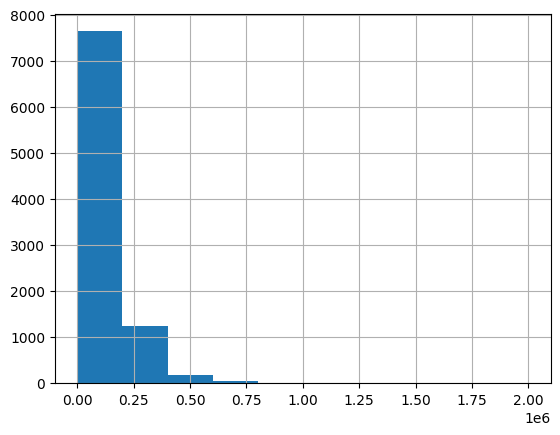

In [8]:
df['ingreso'].hist()

In [9]:
df['aesc']

,aesc
0,11
1,12
2,9
3,12
4,12
...,...
12496,0
12497,3
12498,3
12499,7


In [10]:
df['aesc'].describe()

,aesc
count,9105.000000
mean,13.584734
std,6.957779
min,0.000000
25%,12.000000
50%,13.000000
75%,17.000000
max,99.000000


In [11]:
df=df.loc[df.aesc<90]

<Axes: >

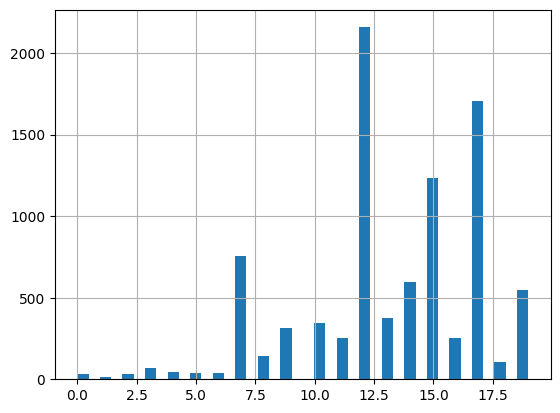

In [12]:
df.aesc.hist(bins=40)

In [13]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  #datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  #datos=datos.dropna()
  Y=data[lista[0]]
  X=data[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X, missing='drop')
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

# Altenativa 1:
Defino el modelo con sm.OLS
Agrego la constante usando sm.add_constant
Uso la opción "drop" para eliminar filas con missing values

In [14]:
resultados=regress(['ingreso','aesc'], df)
#sm.OLS(df['ingreso'],sm.add_constant(df['aesc']), missing='drop')


                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1930.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        19:01:05   Log-Likelihood:            -1.1779e+05
No. Observations:                9062   AIC:                         2.356e+05
Df Residuals:                    9060   BIC:                         2.356e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.489e+04   4129.920    -10.868      0.0

In [15]:
dfmodel=df[['ingreso','aesc']].dropna()

Text(0.5, 1.0, 'Data y valores ajustados')

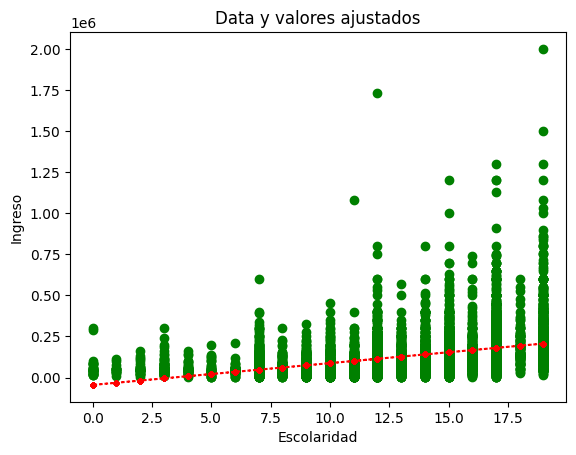

In [16]:
plt.scatter(dfmodel.aesc, dfmodel.ingreso, color='green')

plt.plot(dfmodel.aesc, resultados.predict(), color= "red", marker='.', linestyle=':')

plt.xlabel('Escolaridad')

plt.ylabel('Ingreso')

plt.title('Data y valores ajustados')

#plt.ylim(0,15)


# Breusch and Pagan Test

In [20]:

import statsmodels.stats.api as sms

# Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(resultados.resid, resultados.model.exog)

print(dict(zip(names, test)))
# La hipótesis nula es de homocedasticidad.
# El estadístico de prueba es el LM (Lagrange multiplier).
# El p-valor del test es el que se reporta en la posición 1 de la lista test
# Si el p-valor es menor al nivel de significancia elegido, rechazamos la hipótesis nula.


{'Lagrange multiplier statistic': np.float64(97.95308921367207), 'p-value': np.float64(4.284124362607148e-23), 'f-value': np.float64(99.00160018216837), 'f p-value': np.float64(3.3179597835556616e-23)}


# Cómo son los residuos (errores estimados) en mis datos?


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
# Assuming 'res' is your fitted regression model
residuals = res.resid
fitted_values = res.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='gray', linestyle='--')  # Add horizontal line at y=0
plt.show()

## Test de White
Utilizamos p-value del LM-Test  que es el  p-value para la hipotesis nula de que la varianza del error es homocedastica


In [ ]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

# Assuming 'model' is your fitted regression model
white_test_results = het_white(res.resid, res.model.exog)

print("White Test Results:")
print("LM Statistic:", white_test_results[0])
print("LM-Test p-value:", white_test_results[1])


# Estimación Regresion con varianza robusta

Para los ajustes a los errores estándares por heterocedasticidad, usamos los errores robustos tipicamente denotados HC0-HC3
https://jslsoc.sitehost.iu.edu/files_research/testing_tests/hccm/00TAS.pdf

In [ ]:
mod = smf.ols(formula='ingreso ~ aesc', data=df, )

res = mod.fit(cov_type='HC0')

print(res.summary())


In [ ]:
mod = smf.ols(formula='ingreso ~ aesc', data=df, )

res = mod.fit(cov_type='HC1')

print(res.summary())

# Revisamos el supuesto de normalidad

In [ ]:
residuos.hist()

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()

### Shapiro-Wilk Normality Test
La hipótesis nula es la normalidad de la distribución


In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p = shapiro(residuals)

# Print the test statistic and the p-value
print("Test Statistic:", stat)
print("P-Value:", p)

# Interpret the result
alpha = 0.05  # Significance level
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Vamos a probar la transformación logarítmica al modelo

$$ log(ingreso_i)=\beta_0+\beta_1 aesc_i+\epsilon_i $$

In [ ]:
df['logingreso']=np.where(df['ingtot_2']>0,np.log(df['ingtot_2']),np.nan)

In [ ]:
mod = smf.ols(formula='logingreso ~ aesc', data=df, )

res = mod.fit(cov_type='HC1')

print(res.summary())

In [ ]:
res.resid.hist()

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p = shapiro(res.resid)

# Print the test statistic and the p-value
print("Test Statistic:", stat)
print("P-Value:", p)

# Interpret the result
alpha = 0.05  # Significance level
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(res.resid, dist="norm", plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()